In [3]:
import numpy as np
import pandas as pd
import talib as ta


In [6]:
eurusd = pd.read_csv("../Data/eurusdprepared.csv")

In [6]:
eurusd.head()

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,ema_min,...,wma,std,low_shift,high_shift,close_low,close_high,tp,sl,tp_,sl_
0,75,1302138000,1.43332,1.43337,1.43199,1.43238,1100,12,0,1.432390,...,1.430572,0.004153,1.43115,1.43246,0.00008,0.00039,1.43246,1.43115,0.00039,0.00008
1,76,1302141600,1.43237,1.43246,1.43115,1.43152,2138,13,0,1.432232,...,1.430796,0.004026,1.43072,1.43230,0.00078,0.00037,1.43072,1.43230,-0.00078,0.00037
2,77,1302145200,1.43154,1.43230,1.43072,1.43141,2313,13,0,1.432083,...,1.430978,0.003849,1.43011,1.43143,0.00002,0.00069,1.43143,1.43011,0.00069,0.00002
3,78,1302148800,1.43142,1.43143,1.43011,1.43041,1666,12,0,1.431779,...,1.431093,0.003635,1.43020,1.43161,0.00120,0.00030,1.43020,1.43161,-0.00120,0.00030
4,79,1302152400,1.43037,1.43161,1.43020,1.43104,1482,12,0,1.431644,...,1.431196,0.003366,1.42970,1.43128,0.00024,0.00084,1.43128,1.42970,0.00084,0.00024


In [4]:
eurusd

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,ema_min,...,adx,rsi,wma,std,low_shift,high_shift,close_low,close_high,tp,sl
0,75,1302138000,1.43332,1.43337,1.43199,1.43238,1100,12,0,1.432390,...,22.222109,61.470708,1.430572,0.004153,1.43115,1.43246,0.00008,0.00039,1.43246,1.43115
1,76,1302141600,1.43237,1.43246,1.43115,1.43152,2138,13,0,1.432232,...,22.218362,59.412637,1.430796,0.004026,1.43072,1.43230,0.00078,0.00037,1.43072,1.43230
2,77,1302145200,1.43154,1.43230,1.43072,1.43141,2313,13,0,1.432083,...,22.139870,59.150596,1.430978,0.003849,1.43011,1.43143,0.00002,0.00069,1.43143,1.43011
3,78,1302148800,1.43142,1.43143,1.43011,1.43041,1666,12,0,1.431779,...,21.958979,56.794845,1.431093,0.003635,1.43020,1.43161,0.00120,0.00030,1.43020,1.43161
4,79,1302152400,1.43037,1.43161,1.43020,1.43104,1482,12,0,1.431644,...,21.806215,57.887897,1.431196,0.003366,1.42970,1.43128,0.00024,0.00084,1.43128,1.42970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69919,69994,1657832400,1.00139,1.00378,1.00123,1.00294,6873,0,0,1.001369,...,15.621979,48.607839,1.002153,0.002914,1.00123,1.00321,0.00027,0.00171,1.00321,1.00123
69920,69995,1657836000,1.00295,1.00321,1.00123,1.00157,5553,0,0,1.001405,...,15.180663,47.010058,1.002070,0.002923,1.00101,1.00233,0.00076,0.00034,1.00101,1.00233
69921,69996,1657839600,1.00157,1.00233,1.00101,1.00178,1924,0,0,1.001473,...,14.777338,47.284827,1.001962,0.002594,1.00127,1.00191,0.00013,0.00077,1.00191,1.00127
69922,69997,1657843200,1.00154,1.00191,1.00127,1.00186,1446,7,0,1.001544,...,14.387457,47.392330,1.001866,0.002445,1.00166,1.00236,0.00050,0.00059,1.00236,1.00166


In [12]:
eurusd_corr = eurusd.corr()

In [14]:
eurusd_corr

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,ema_min,...,wma,std,low_shift,high_shift,close_low,close_high,tp,sl,tp_,sl_
Unnamed: 0,1.000000,0.999998,-0.686690,-0.687645,-0.685837,-0.686688,0.001976,-0.514508,-0.067165,-0.686819,...,-0.686929,-0.301539,-0.685835,-0.687643,-0.151540,-0.157629,-0.686573,-0.686863,0.011141,-0.145631
time,0.999998,1.000000,-0.687257,-0.688212,-0.686405,-0.687256,0.002334,-0.514362,-0.066365,-0.687387,...,-0.687497,-0.301542,-0.686403,-0.688210,-0.151542,-0.157650,-0.687141,-0.687431,0.011127,-0.145640
open,-0.686690,-0.687257,1.000000,0.999954,0.999956,0.999927,-0.235040,0.113819,-0.312244,0.999896,...,0.999633,0.163091,0.999878,0.999878,0.073884,0.087206,0.999853,0.999840,0.002124,0.075863
high,-0.687645,-0.688212,0.999954,1.000000,0.999920,0.999959,-0.230914,0.114454,-0.310875,0.999865,...,0.999591,0.164927,0.999890,0.999933,0.076337,0.094716,0.999907,0.999853,0.005751,0.080536
low,-0.685837,-0.686405,0.999956,0.999920,1.000000,0.999961,-0.239039,0.113152,-0.313469,0.999863,...,0.999586,0.161202,0.999935,0.999891,0.071770,0.086010,0.999896,0.999867,0.002931,0.074289
close,-0.686688,-0.687256,0.999927,0.999959,0.999961,1.000000,-0.235093,0.113786,-0.312247,0.999852,...,0.999569,0.162964,0.999954,0.999952,0.074040,0.094843,0.999967,0.999876,0.007612,0.079877
tick_volume,0.001976,0.002334,-0.235040,-0.230914,-0.239039,-0.235093,1.000000,0.080731,0.561471,-0.234758,...,-0.234591,0.181037,-0.237990,-0.232058,0.290821,0.421646,-0.234710,-0.235318,0.078123,0.358616
spread,-0.514508,-0.514362,0.113819,0.114454,0.113152,0.113786,0.080731,1.000000,0.195846,0.114001,...,0.114208,0.232495,0.113096,0.114441,0.075686,0.081432,0.113723,0.113807,-0.007554,0.065796
real_volume,-0.067165,-0.066365,-0.312244,-0.310875,-0.313469,-0.312247,0.561471,0.195846,1.000000,-0.312242,...,-0.312292,0.041768,-0.313187,-0.311139,0.088266,0.108927,-0.312167,-0.312138,0.012055,0.099757
ema_min,-0.686819,-0.687387,0.999896,0.999865,0.999863,0.999852,-0.234758,0.114001,-0.312242,1.000000,...,0.999891,0.163797,0.999801,0.999803,0.073976,0.089167,0.999789,0.999753,0.003530,0.077307


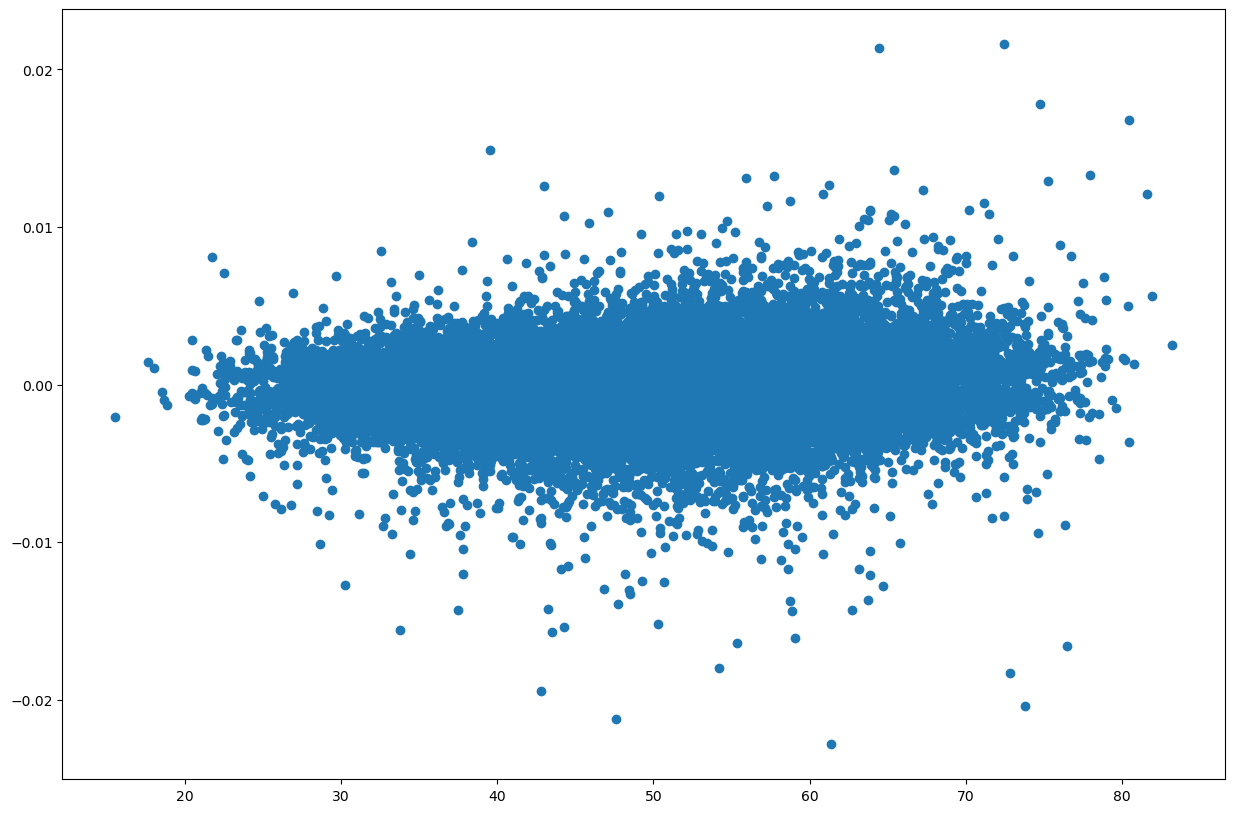

In [28]:
plt.figure(figsize=(15, 10))
plt.scatter(eurusd.rsi, eurusd.tp_)

In [7]:
selected_features = eurusd[["open", "high", "low", "close","rsi", "on_balance_volume", "std", "ema_max", "adx", "wma", "tp", "sl", "close_shift"]]
selected_features.head()
selected_features.to_csv("../Data/modeldata.csv")